In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

class GradientBoostingPolynomial:
    def __init__(self, degree=2, n_estimators=100, learning_rate=0.1):
        self.degree = degree
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.models = []
        self.poly = PolynomialFeatures(degree=degree)
        self.base_prediction = 0

    def fit(self, X, y):
        # Инициализация предсказания средней целевой величиной
        self.base_prediction = np.mean(y)
        y_pred = np.full_like(y, self.base_prediction, dtype=np.float64)

        for _ in range(self.n_estimators):
            # Вычисляем отрицательный градиент (остаток)
            residuals = y - y_pred

            # Преобразуем данные в полиномиальные признаки
            X_poly = self.poly.fit_transform(X)

            # Обучаем полиномиальную модель на остатках
            model = LinearRegression()
            model.fit(X_poly, residuals)

            # Добавляем модель в ансамбль
            self.models.append(model)

            # Обновляем предсказания
            y_pred += self.learning_rate * model.predict(X_poly)

    def predict(self, X):
        """Предсказание целевой переменной для заданных данных."""
        # Инициализация предсказаний базовым значением
        y_pred = np.full(X.shape[0], self.base_prediction, dtype=np.float64)

        X_poly = self.poly.fit_transform(X)
        for model in self.models:
            y_pred += self.learning_rate * model.predict(X_poly)

        return y_pred

np.random.seed(1)
X = np.random.rand(100, 1) * 10  
y = 5 * X.flatten()**2 - 3 * X.flatten() + 10 + np.random.randn(100) * 10

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbp = GradientBoostingPolynomial(degree=2, n_estimators=50, learning_rate=0.1)
gbp.fit(X_train, y_train)


y_pred = gbp.predict(X_test)

print("MSE на тестовых данных:", mean_squared_error(y_test, y_pred))

# Сравнение с обычной полиномиальной регрессией
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
linear_model = LinearRegression()
linear_model.fit(X_poly_train, y_train)
y_poly_pred = linear_model.predict(X_poly_test)
print("MSE обычной полиномиальной регрессии (тест):", mean_squared_error(y_test, y_poly_pred))

if mean_squared_error(y_test, y_pred) > mean_squared_error(y_test, y_poly_pred):
    print("Обычный полином лучше")
else:
    print("Бустинг лучше")


MSE на тестовых данных: 62.97704550384466
MSE обычной полиномиальной регрессии (тест): 63.58406072820785
Бустинг лучше


MSE на сложных данных: 53.926789959073496
MSE обычной полиномиальной регрессии на сложных данных: 53.92763077321286
Бустинг лучше

MSE на шумных данных: 1576.9095598458557
MSE обычной полиномиальной регрессии на шумных данных: 1576.909559846692
Бустинг лучше


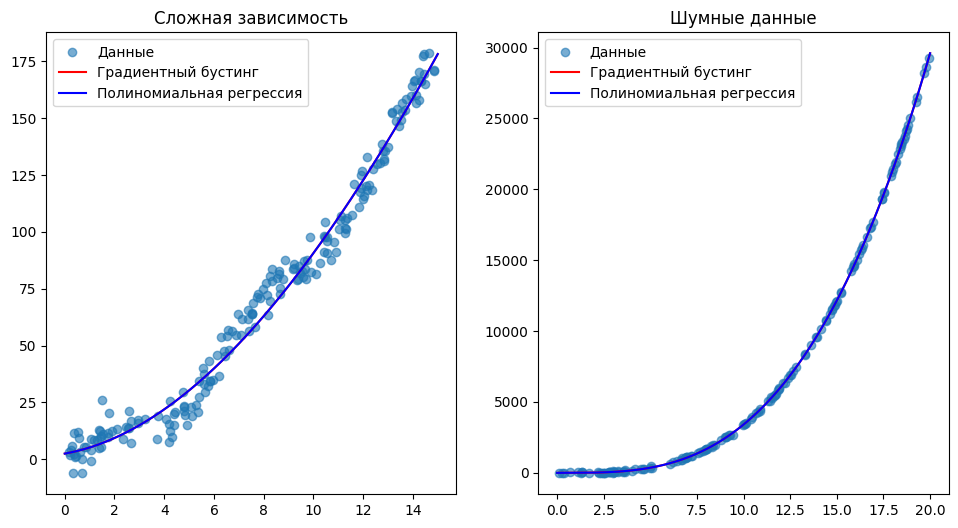

In [ ]:
# Более сложная зависимость
X_complex = np.random.rand(200, 1) * 15  # 200 точек в диапазоне [0, 15]
y_complex = 7 * np.sin(X_complex.flatten()) + 3 * X_complex.flatten()**1.5 - 2 + np.random.randn(200) * 5
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_complex, y_complex, test_size=0.3, random_state=42)
gbp_complex = GradientBoostingPolynomial(degree=3, n_estimators=100, learning_rate=0.1)
gbp_complex.fit(X_train_c, y_train_c)
y_pred_c = gbp_complex.predict(X_test_c)
print("MSE на сложных данных:", mean_squared_error(y_test_c, y_pred_c))

# Сравнение с обычной полиномиальной регрессией для сложной зависимости
poly_complex = PolynomialFeatures(degree=3)
X_poly_train_c = poly_complex.fit_transform(X_train_c)
X_poly_test_c = poly_complex.transform(X_test_c)
linear_model_complex = LinearRegression()
linear_model_complex.fit(X_poly_train_c, y_train_c)
y_poly_pred_c = linear_model_complex.predict(X_poly_test_c)
print("MSE обычной полиномиальной регрессии на сложных данных:", mean_squared_error(y_test_c, y_poly_pred_c))


if mean_squared_error(y_test_c,  y_pred_c) > mean_squared_error(y_test_c, y_poly_pred_c):
    print("Обычный полином лучше")
else:
    print("Бустинг лучше")

print()
# Высокошумные данные
X_noisy = np.random.rand(150, 1) * 20
y_noisy = 4 * X_noisy.flatten()**3 - 6 * X_noisy.flatten()**2 + np.random.randn(150) * 50
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_noisy, y_noisy, test_size=0.25, random_state=42)
gbp_noisy = GradientBoostingPolynomial(degree=4, n_estimators=200, learning_rate=0.15)
gbp_noisy.fit(X_train_n, y_train_n)
y_pred_n = gbp_noisy.predict(X_test_n)
print("MSE на шумных данных:", mean_squared_error(y_test_n, y_pred_n))

# Сравнение с обычной полиномиальной регрессией для шумных данных
poly_noisy = PolynomialFeatures(degree=4)
X_poly_train_n = poly_noisy.fit_transform(X_train_n)
X_poly_test_n = poly_noisy.transform(X_test_n)
linear_model_noisy = LinearRegression()
linear_model_noisy.fit(X_poly_train_n, y_train_n)
y_poly_pred_n = linear_model_noisy.predict(X_poly_test_n)
print("MSE обычной полиномиальной регрессии на шумных данных:", mean_squared_error(y_test_n, y_poly_pred_n))

if mean_squared_error(y_test_n,  y_pred_n) > mean_squared_error(y_test_n, y_poly_pred_n):
    print("Обычный полином лучше")
else:
    print("Бустинг лучше")


plt.figure(figsize=(18, 6))

# График для сложных данных
plt.subplot(1, 3, 1)
plt.scatter(X_complex, y_complex, label="Данные", alpha=0.6)
X_line_c = np.linspace(0, 15, 500).reshape(-1, 1)
y_line_c = gbp_complex.predict(X_line_c)
y_line_poly_c = linear_model_complex.predict(poly_complex.transform(X_line_c))
plt.plot(X_line_c, y_line_c, color="red", label="Градиентный бустинг")
plt.plot(X_line_c, y_line_poly_c, color="blue", label="Полиномиальная регрессия")
plt.title("Сложная зависимость")
plt.legend()

# График для шумных данных
plt.subplot(1, 3, 2)
plt.scatter(X_noisy, y_noisy, label="Данные", alpha=0.6)
X_line_n = np.linspace(0, 20, 500).reshape(-1, 1)
y_line_n = gbp_noisy.predict(X_line_n)
y_line_poly_n = linear_model_noisy.predict(poly_noisy.transform(X_line_n))
plt.plot(X_line_n, y_line_n, color="red", label="Градиентный бустинг")
plt.plot(X_line_n, y_line_poly_n, color="blue", label="Полиномиальная регрессия")
plt.title("Шумные данные")
plt.legend()

plt.show()


<font size = 4>Очевидно, что бустинг, что есть комбинация полиномов, есть полином с более сложными коэффициентами и с большим количеством параметров, которые можно регулировать. Изменим слегка модель бустинга, заменим полином на сегментированный полином.
 </font>

MSE Градиентного бустинга сегментированным полиномом: 4.55759108098626
MSE Бустинга деревьями: 5.079935941852962


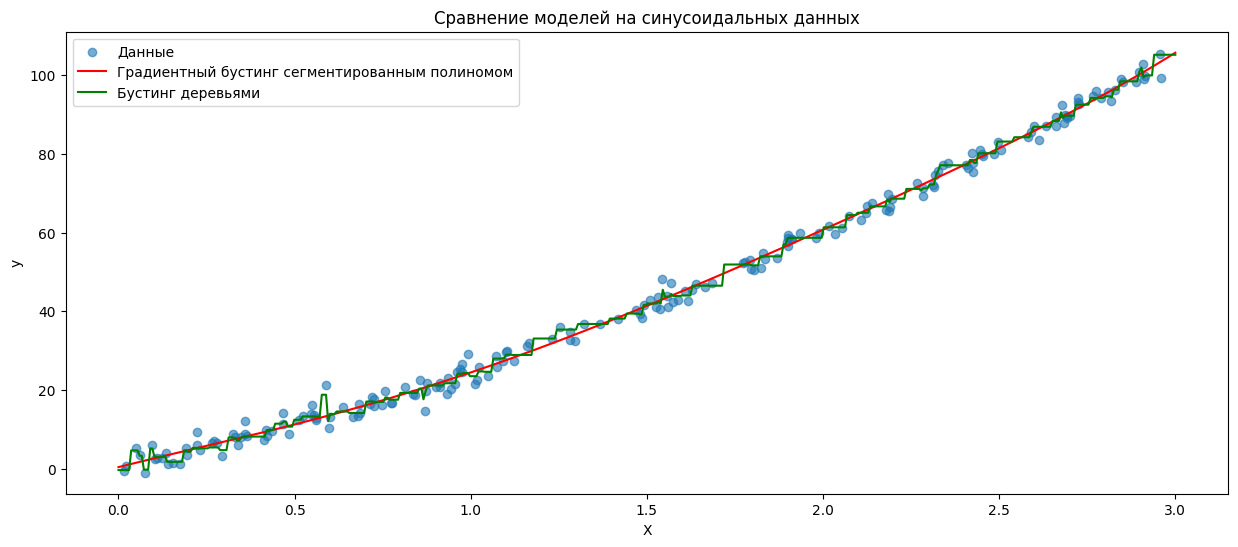

In [ ]:
class GradientBoostingSegmentedPolynomial:
    def __init__(self, degree=1, n_estimators=100, learning_rate=0.1, n_segments=4):
        self.degree = degree
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.n_segments = n_segments
        self.models = []
        self.base_prediction = 0

    def fit(self, X, y):
        """Обучение градиентного бустинга с использованием сегментированных полиномиальных моделей."""
        self.base_prediction = np.mean(y)
        y_pred = np.full_like(y, self.base_prediction, dtype=np.float64)

        for _ in range(self.n_estimators):
            residuals = y - y_pred

            # Делим данные на сегменты
            if self.n_segments > 1:
                segments = np.linspace(X.min(), X.max(), self.n_segments + 1)[1:-1]
            else:
                segments = []  

            model = []

            for i in range(len(segments) + 1):
                if len(segments) == 0:  
                    mask = np.ones_like(X.flatten(), dtype=bool)
                elif i == 0:
                    mask = X.flatten() <= segments[0]
                elif i == len(segments):
                    mask = X.flatten() > segments[-1]
                else:
                    mask = (X.flatten() > segments[i - 1]) & (X.flatten() <= segments[i])

                # Обучаем полиномиальную регрессию для каждого сегмента
                X_seg = X[mask].reshape(-1, 1)
                res_seg = residuals[mask]

                if len(X_seg) > 0:
                    poly = PolynomialFeatures(degree=self.degree)
                    X_poly_seg = poly.fit_transform(X_seg)
                    poly_model = LinearRegression()
                    poly_model.fit(X_poly_seg, res_seg)
                    model.append((poly_model, poly, i))

            self.models.append((model, segments))

            # Обновляем предсказания
            for poly_model, poly, i in model:
                if len(segments) == 0:  
                    mask = np.ones_like(X.flatten(), dtype=bool)
                elif i == 0:
                    mask = X.flatten() <= segments[0]
                elif i == len(segments):
                    mask = X.flatten() > segments[-1]
                else:
                    mask = (X.flatten() > segments[i - 1]) & (X.flatten() <= segments[i])

                if np.any(mask):  
                    X_poly_seg = poly.transform(X[mask].reshape(-1, 1))
                    y_pred[mask] += self.learning_rate * poly_model.predict(X_poly_seg)

    def predict(self, X):
        """Предсказание целевой переменной для заданных данных."""
        y_pred = np.full(X.shape[0], self.base_prediction, dtype=np.float64)

        for model, segments in self.models:
            for poly_model, poly, i in model:
                if len(segments) == 0:  
                    mask = np.ones_like(X.flatten(), dtype=bool)
                elif i == 0:
                    mask = X.flatten() <= segments[0]
                elif i == len(segments):
                    mask = X.flatten() > segments[-1]
                else:
                    mask = (X.flatten() > segments[i - 1]) & (X.flatten() <= segments[i])

                if np.any(mask):  
                    X_poly_seg = poly.transform(X[mask].reshape(-1, 1))
                    y_pred[mask] += self.learning_rate * poly_model.predict(X_poly_seg)

        return y_pred

X = np.random.rand(200, 1) * 3 
y = (0.5 * X **2 + X*2).flatten() * 10 + np.random.randn(200) * 2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Градиентный бустинг с сегментами
gbp = GradientBoostingSegmentedPolynomial(degree=5, n_estimators=100, learning_rate=0.1, n_segments=1)
gbp.fit(X_train, y_train)
y_pred_gbp = gbp.predict(X_test)

# Стандартный градиентный бустинг
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

print("MSE Градиентного бустинга сегментированным полиномом:", mean_squared_error(y_test, y_pred_gbp))
print("MSE Бустинга деревьями:", mean_squared_error(y_test, y_pred_gbr))

X_line = np.linspace(0, 3, 500).reshape(-1, 1)
y_line_gbp = gbp.predict(X_line)
y_line_gbr = gbr.predict(X_line)

plt.figure(figsize=(15, 6))
plt.scatter(X, y, label="Данные", alpha=0.6)
plt.plot(X_line, y_line_gbp, label="Градиентный бустинг сегментированным полиномом", color="red")
plt.plot(X_line, y_line_gbr, label="Бустинг деревьями", color="green")
plt.legend()
plt.title("Сравнение моделей на синусоидальных данных")
plt.xlabel("X")
plt.ylabel("y")
plt.show()



Очевидно, что данные, сгенерированные полиномиальной комбинацией, лучше приближаютя непосредственно полиномом. Попробуем приблизить более сложные кривые

MSE Градиентного бустинга сегментированным полиномом: 4.992603451510726
MSE Бустинга деревьями: 5.8643437060278485


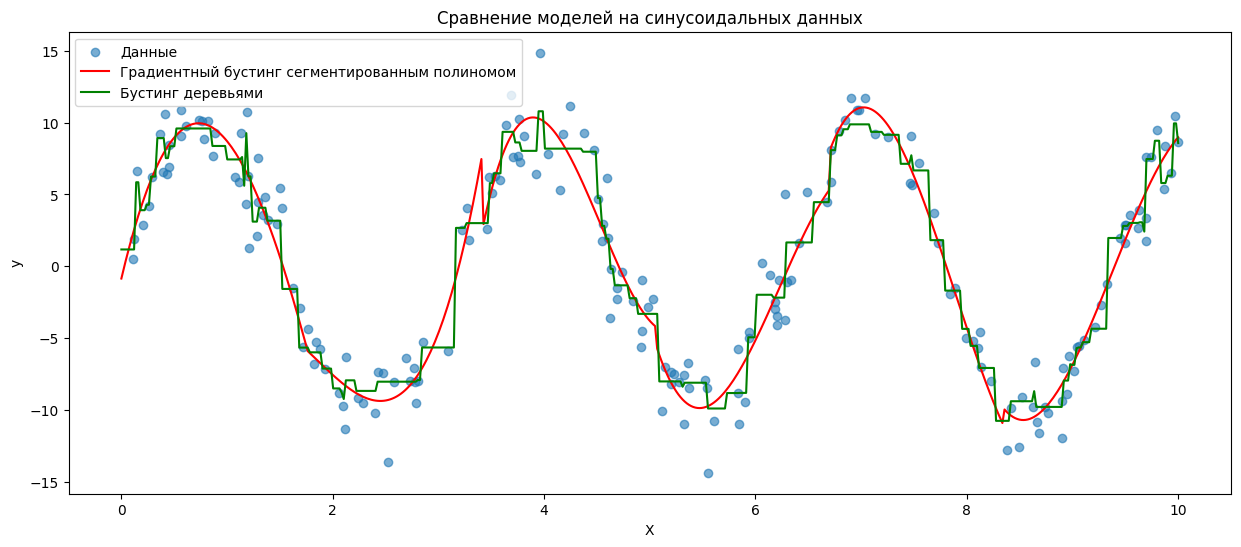

In [9]:

X = np.random.rand(200, 1) * 10  # 200 точек в диапазоне [0, 10]
y = np.sin(X*2).flatten() * 10 + np.random.randn(200) * 2

# Разделение на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Градиентный бустинг с сегментами
gbp = GradientBoostingSegmentedPolynomial(degree=3, n_estimators=100, learning_rate=0.1, n_segments=6)
gbp.fit(X_train, y_train)
y_pred_gbp = gbp.predict(X_test)

# Стандартный градиентный бустинг
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

# MSE сравнение
print("MSE Градиентного бустинга сегментированным полиномом:", mean_squared_error(y_test, y_pred_gbp))
print("MSE Бустинга деревьями:", mean_squared_error(y_test, y_pred_gbr))

# Визуализация
X_line = np.linspace(0, 10, 500).reshape(-1, 1)
y_line_gbp = gbp.predict(X_line)
y_line_gbr = gbr.predict(X_line)

plt.figure(figsize=(15, 6))
plt.scatter(X, y, label="Данные", alpha=0.6)
plt.plot(X_line, y_line_gbp, label="Градиентный бустинг сегментированным полиномом", color="red")
# plt.plot(X_line, y_line_segmented, label="Сегментированный полином", color="blue")
plt.plot(X_line, y_line_gbr, label="Бустинг деревьями", color="green")
plt.legend()
plt.title("Сравнение моделей на синусоидальных данных")
plt.xlabel("X")
plt.ylabel("y")
plt.show()